# KMeans Clustering

In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree


In [2]:
# Load the dataset
import sklearn.datasets as datasets
iris=datasets.load_iris()

In [3]:
# Dataframe formation
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.shape

(150, 4)

In [9]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

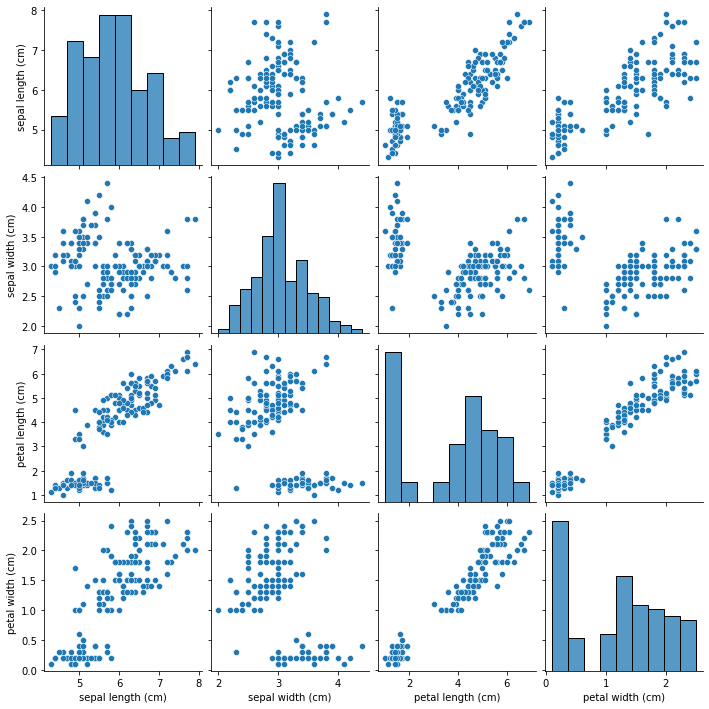

In [10]:
sns.pairplot(iris_df)

In [11]:
iris_df['target']=iris.target

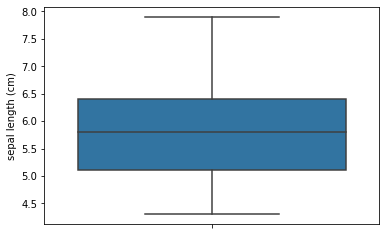

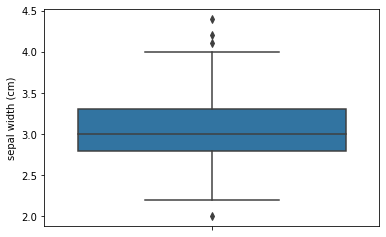

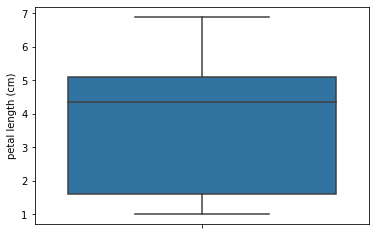

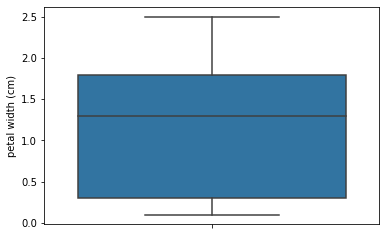

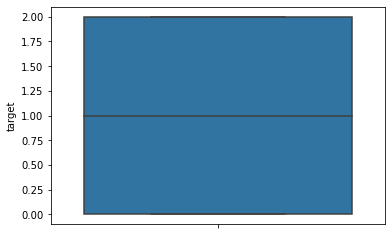

In [12]:
cols = iris_df.columns
for i in cols:
    sns.boxplot(y=iris_df[i])
    plt.show()

In [13]:
# Remove the outliers from sepal width
q1 = iris_df['sepal width (cm)'].quantile(0.25)
q3 = iris_df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
iris_df = iris_df[(iris_df['sepal width (cm)'] >= q1-1.5*iqr) & (iris_df['sepal width (cm)'] <= q3+1.5*iqr)]
iris_df.shape

(146, 5)

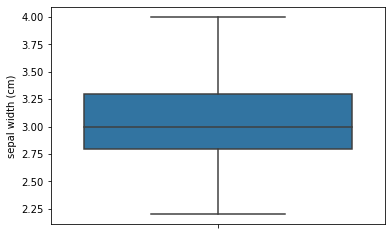

In [14]:
sns.boxplot(y=iris_df['sepal width (cm)'])
plt.show()

In [15]:
# Standardizing to avoid bias
standard_scaler = StandardScaler()
df = standard_scaler.fit_transform(iris_df.drop('target', axis=1))


In [16]:
#To find the optimal no. of cluster
cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(df)  
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

,num_cluster,cluster_errors
0,1,584.000000
1,2,217.499302
2,3,134.345832
3,4,109.767399
4,5,88.927558
5,6,77.731235
6,7,68.034136
7,8,61.058200
8,9,52.183398
9,10,45.795495


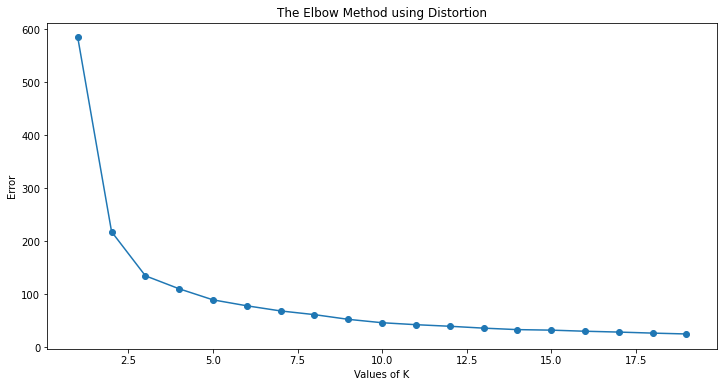

In [17]:
#Ploting elbow curve or sree to find the no. of cluster
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [18]:
# Creating object of the model and fitting it
model = KMeans(n_clusters=3, max_iter=50)
model.fit(iris_df.drop('target',axis=1))

KMeans(max_iter=50, n_clusters=3)

In [19]:
# Analysis of cluster found
iris_df.index = pd.RangeIndex(len(iris_df.index))
df_km = pd.concat([iris_df.drop('target',axis=1), pd.Series(model.labels_)], axis=1)
df_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'ClusterID']

km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))

In [20]:
df2 = pd.concat([pd.Series([0,1,2]), km_clusters_Slength, km_clusters_Swidth, km_clusters_Plength, km_clusters_Pwidth
                ], axis=1)
df2.columns = ['ClusterID','sepal length (cm)_mean','sepal width (cm)_mean','petal length (cm)_mean',
               'petal width (cm)_mean']
df2.head()

,ClusterID,sepal length (cm)_mean,sepal width (cm)_mean,petal length (cm)_mean,petal width (cm)_mean
0,0,5.916393,2.760656,4.408197,1.440984
1,1,4.976596,3.376596,1.461702,0.246809
2,2,6.850000,3.073684,5.742105,2.071053


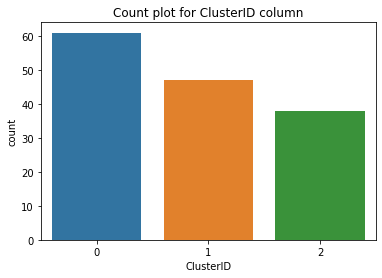

In [21]:
sns.countplot(x=df_km.ClusterID)
plt.title('Count plot for ClusterID column')
plt.show()

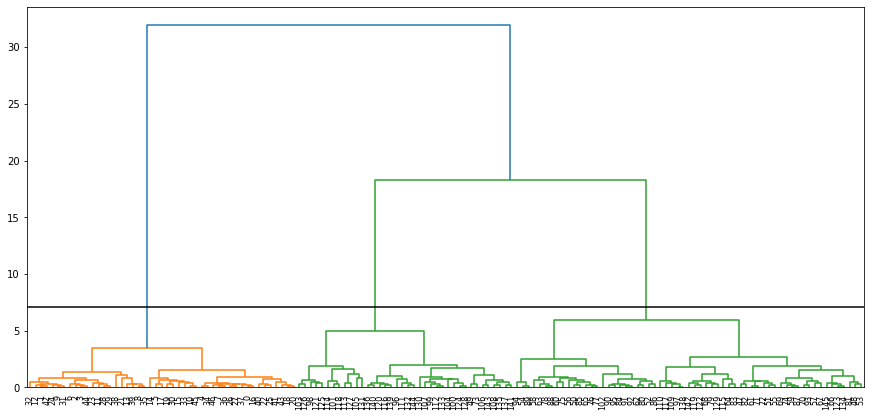

In [22]:
#heirarchical clustering with full dendrogram
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance
dendrogram(mergings,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=150,                  # Try changing values of p
           leaf_rotation=90.,      # rotates the x axis labels
           leaf_font_size=8.,      # font size for the x axis labels
          )

plt.axhline(y=max_d, c='k')
plt.show()

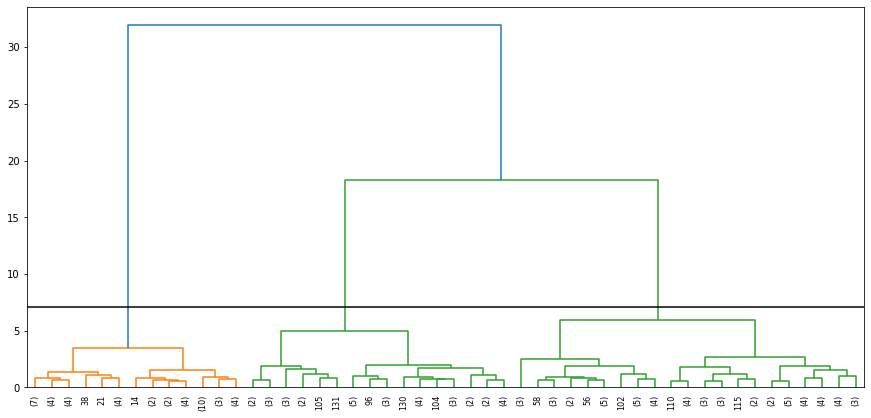

In [23]:
#heirarchical clustering with full dendrogram for 50
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance
dendrogram(mergings,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=50,                  # Try changing values of p
           leaf_rotation=90.,      # rotates the x axis labels
           leaf_font_size=8.,      # font size for the x axis labels
          )

plt.axhline(y=max_d, c='k')
plt.show()

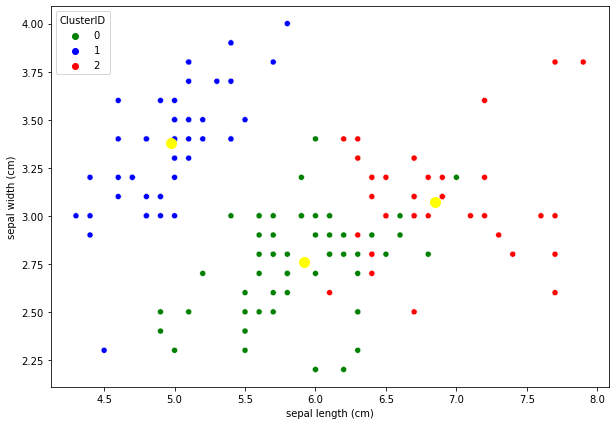

In [24]:
# Scatter plot to visualize the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)', data=df_km, hue='ClusterID', palette=['green','blue','red'])

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()

In [25]:
model.cluster_centers_

array([[5.91639344, 2.76065574, 4.40819672, 1.44098361],
       [4.97659574, 3.37659574, 1.46170213, 0.24680851],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [26]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [27]:
predictions =  pd.Series(model.labels_)

In [28]:
predictions

0      1
1      1
2      1
3      1
4      1
      ..
141    2
142    0
143    2
144    2
145    0
Length: 146, dtype: int32